In [133]:
import matplotlib.pyplot as plt
import numpy as np

In [137]:
class Interval:
    def __init__(self, start_val, end_val, start_type, end_type, color, id):
        """
        Define instance fields.
        """
        self.start_val = start_val
        self.end_val = end_val
        self.start_type = start_type
        self.end_type = end_type
        self.color = color
        self.id = id
    
    def get_parameters(self) -> dict:
        """
        Return all attributes of a given Interval in a dictionary.
        """
        return {
            'min_val': self.start_val,
            'max_val': self.end_val,
            'left': self.start_type,
            'right': self.end_type,
            'color': self.color,
            'id': self.id,
        }

In [139]:
def plot_intervals(interval_list):
    """
    Plots intervals on a real number line.
    """
    _, ax = plt.subplots(figsize=(10, 6))
    y_position = 0
    padding = 5
    line_width = 3
    marker_size = 10
    marker_edge_width = 1
    global_min = np.inf
    global_max = -np.inf
    for attrs in interval_list:
        min_val = attrs['min_val']
        if min_val < global_min:
            global_min = min_val
        max_val = attrs['max_val']
        if global_max < max_val:
            global_max = max_val
        left = attrs['left']
        right = attrs['right']
        clr = attrs['color']
        interval = [(min_val, max_val)]

        if left not in ['closed', 'open']:
            raise ValueError(f"Cannot parse string: {left}, expecting 'closed' or 'open'.")
        if right not in ['closed', 'open']:
            raise ValueError(f"Cannot parse string: {right}, expecting 'closed' or 'open'.")
        label = ''
        if left == 'open':
            label += '('
            lmfc='none'
        else:
            label += '['
            lmfc=None
        label += f'{min_val}, {max_val}'
        if right == 'open':
            label += ')'
            rmfc='none'
        else:
            label += ']'
            rmfc=None

        ax.axhline(y=y_position, color='black', linewidth=1)
        for start, end in interval:
            ax.plot([start, end], [y_position, y_position], color=clr, linewidth=line_width, label=f"{attrs['id']}: {label}")
            ax.plot(start, y_position, marker='o', markersize=marker_size, color=clr,  markeredgecolor='black', markerfacecolor=lmfc, markeredgewidth=marker_edge_width)
            ax.plot(end, y_position, marker='o', markersize=marker_size, color=clr, markeredgecolor='black', markerfacecolor=rmfc, markeredgewidth=marker_edge_width)
        ax.set_yticks([])
        ax.set_yticklabels([])
        y_position -= 1
    
    ax.set_ylim(y_position - 1, 3)
    ax.set_xlim(global_min - padding, global_max + padding)
    ax.legend()    
    plt.show()


### Example 1

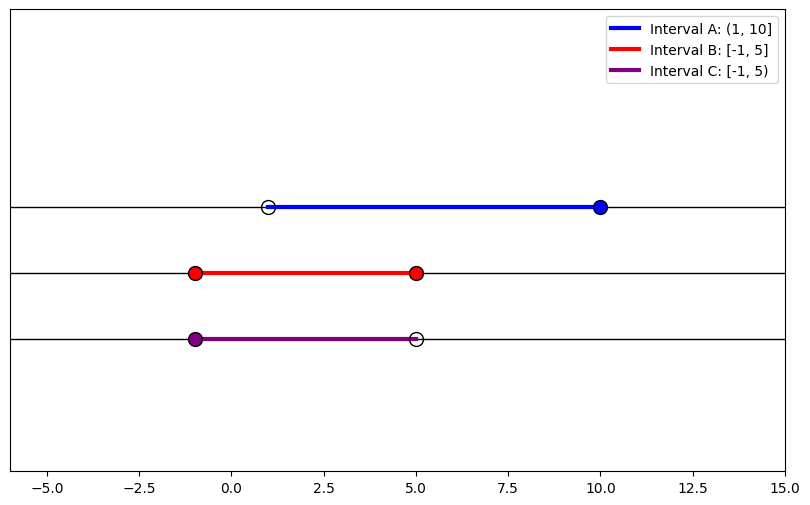

In [ ]:
inputs = []
inputs.append(Interval(1, 10, 'open', 'closed', 'blue', 'Interval A').get_parameters())
inputs.append(Interval(-1, 5, 'closed', 'closed', 'red', 'Interval B').get_parameters())
inputs.append(Interval(-1, 5, 'closed', 'open', 'purple', 'Interval C').get_parameters())
plot_intervals(inputs)

### Example 2

Solve and graph the solution set
$$
    |x + 2| < 3.
$$

<details>
<summary>Click to show solution</summary>

Bound the argument $x + 2$ by $-3$ and $3$ and solve.
$$
    \begin{aligned}
\begin{array} { c } { | x + 2 | < 3 } \\ { - 3 < x + 2 < 3 } \\ { - 3 \color{blue}{- 2}\color{Black}{ <} x + 2 \color{blue}{- 2}\color{Black}{ <} 3 \color{blue}{- 2} } \\ { - 5 < x < 1 } \end{array}
    \end{aligned}
$$

</details>

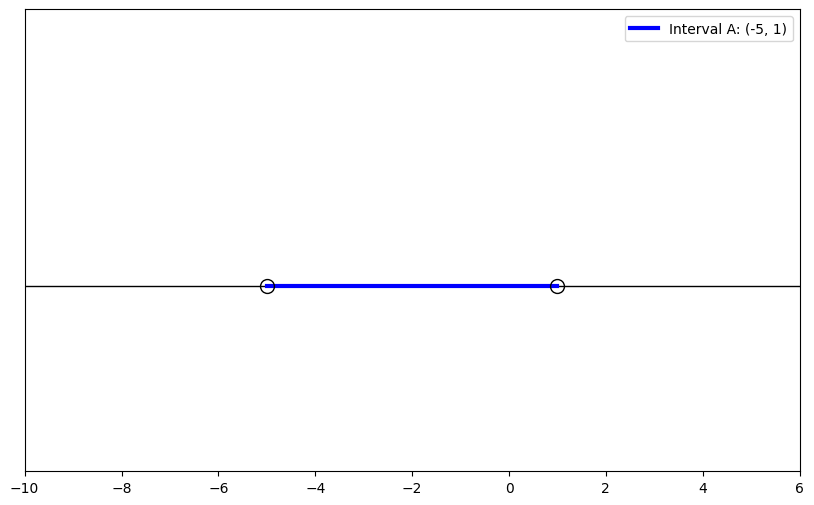

In [142]:
inputs = []
inputs.append(Interval(-5, 1, 'open', 'open', 'blue', 'Interval A').get_parameters())
plot_intervals(inputs)